In [22]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from tqdm import tqdm

In [23]:
df = pd.read_csv('Data/ListaCobroDetalle2025.csv')

In [24]:
# Dime como son los ingresos acumulados a lo largo del tiempo, en este caso ordenados por la variable consecutivoCobro
history = [0]
for i in tqdm(range(len(df))):
    # Haz el valor acumulado de la variable montoCobrado
    # y añade el resultado a la lista history
    history.append(history[i] + df['montoCobrado'][i] - 1.5)
# Añade la lista history como una nueva columna al dataframe df


100%|██████████| 2114172/2114172 [00:05<00:00, 382934.58it/s]


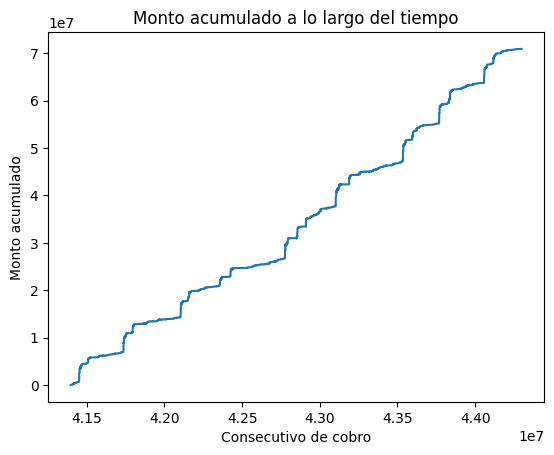

In [25]:
# Visualizar el cada 100 valores
plt.plot(df['consecutivoCobro'][::100], history[::100])
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.show()


100%|██████████| 2114172/2114172 [00:09<00:00, 218530.34it/s]


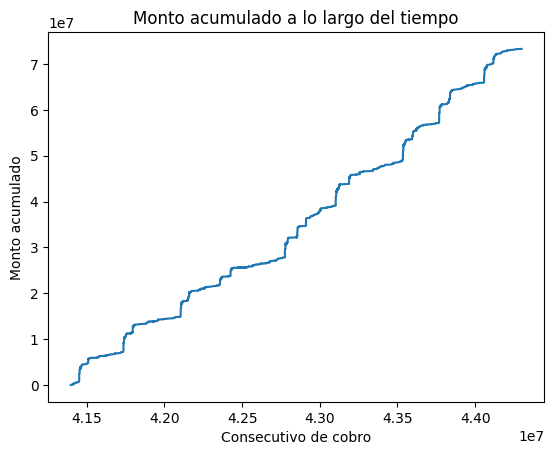

In [26]:
# ahora lo mismo pero la resta 1.5 esta multiplicada por un valor aleatorio entre 0 y 1 y luego por un valor entero entre 0 y 1
history2 = [0]
for i in tqdm(range(len(df))):
    # Haz el valor acumulado de la variable montoCobrado
    # y añade el resultado a la lista history
    history2.append(history2[i] + df['montoCobrado'][i] - 1.5 * np.random.rand() * np.random.randint(0, 2))
# Añade la lista history como una nueva columna al dataframe df
# Visualizar el cada 100 valores
plt.plot(df['consecutivoCobro'][::100], history2[::100])
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.show()

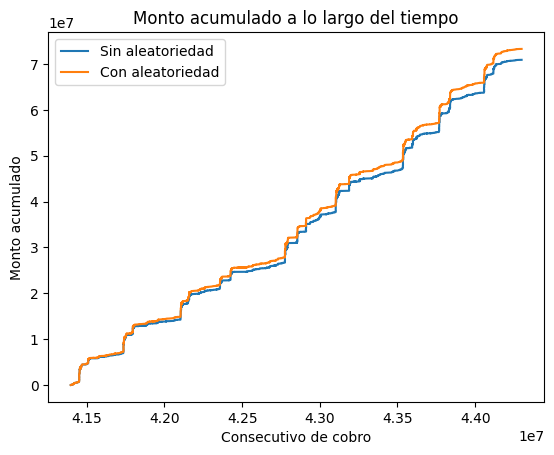

In [29]:
# Comparar los dos graficos
plt.plot(df['consecutivoCobro'][::100], history[::100], label='Sin aleatoriedad')
plt.plot(df['consecutivoCobro'][::100], history2[::100], label='Con aleatoriedad')
plt.xlabel('Consecutivo de cobro')
plt.ylabel('Monto acumulado')
plt.title('Monto acumulado a lo largo del tiempo')
plt.legend()
plt.show()

In [32]:
# Haz que solo sea la historia cada 100
history = history[::100]
history2 = history2[::100]

In [36]:
# Guarda los valores con json para la serie 1 y serie 2
dataframe = pd.DataFrame({'montoAcumulado': history, 'montoAcumulado2': history2})
# Ajustar para que sea {
#   "montoAcumulado": [0, 1, 2, 3],
#   "montoAcumulado2": [0, 1, 2, 3]
#}
# Cambiar el dataframe para que sea un diccionario
dataframe = dataframe.to_dict(orient='records')
import json
with open('Data/series.json', 'w') as f:
    json.dump(dataframe, f)


C:\Users\Felip\AppData\Local\Temp\ipykernel_25648\3389616503.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


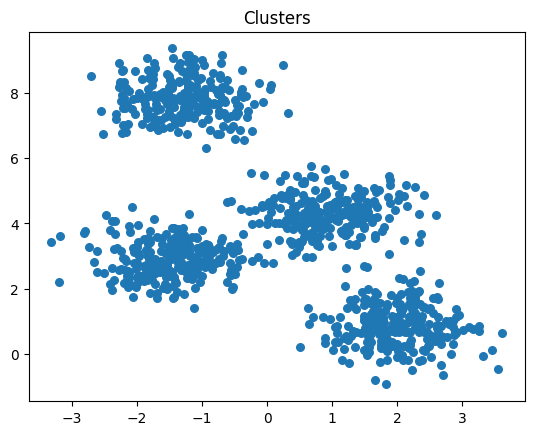

In [37]:
# Ahora haremos un dataset dummy donde generemos 4 clusters, y esos clusters tienen etiquetas
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Clusters')
plt.show()


c:\Users\Felip\miniconda3\envs\MLearn\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


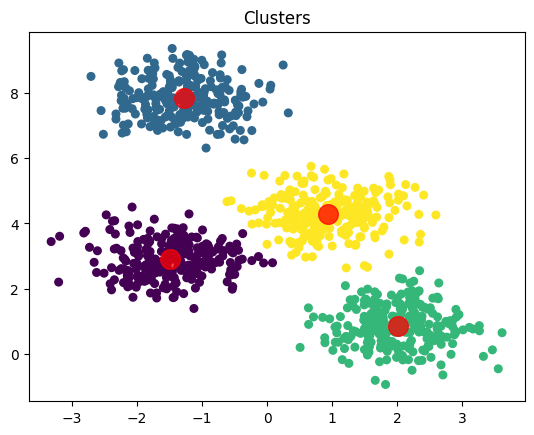

In [38]:
# Aplicamos kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clusters')
plt.show()

In [40]:
# Entonces ahora generaremos un cluster con el siguiente formato
"""
{
    "cluster1": {
        "x": [1, 2, 3],
        "y": [4, 5, 6],
        "propor" : [0.1, 0.2, 0.3]
    },
    "cluster2": {
        "x": [7, 8, 9],
        "y": [10, 11, 12],
        "propor" : [0.4, 0.5, 0.6]
    }
}
"""
# PAra cada cluster generamos una distribucion aleatoria entre 4 valores
import random
clusters = {}
for i in range(4):
    clusters[f'cluster{i}'] = {
        'x': [random.uniform(0, 1) for _ in range(4)],
        'y': [random.uniform(0, 1) for _ in range(4)],
        'propor': [random.uniform(0, 1) for _ in range(4)]
    }
# Normalizamos la propor
for i in range(4):
    total = sum(clusters[f'cluster{i}']['propor'])
    clusters[f'cluster{i}']['propor'] = [x / total for x in clusters[f'cluster{i}']['propor']]
# Guardar el diccionario en un json
with open('Data/clusters.json', 'w') as f:
    json.dump(clusters, f)